# **Introducción al Aprendizaje No Supervisado**


En esta sesión hablaremos sobre el Aprendizaje No Supervisado. Es una de las partes del vasto mundo de la Ciencia de Datos junto con el aprendizaje supervisado. A estas alturas del curso ya estarán familiarizados con la otra rama (supervisada), donde se trabaja ocn datos que vienen con etiquetas predefinidas o conocidas (por ejemplo, clasificar tumores como beningnos o malignos basándose en características conocidas que los definen).

## **1. ¿Qué es el Aprendizaje No Supervisado?**


Imaginad que nos encontramos con un inmenso archivo de datos biológicos o médicos, como perfiles de expresión génica de pacientes o imágenes histopatológicas, pero sin ninguna etiqueta que indique a qué grupo pertenece cada muestra o qué tipo de tejido representa. Aquí es donde el aprendizaje no supervisado entra en acción. Su objetivo principal es **descubrir patrones ocultos, estructuras inherentes y relaciones intrínsecas** dentro de los datos, sin la necesidad de tener "respuestas correctas" o categorías predefinidas. Es como una especie de explorador de datos, buscando significado y organización en un lugar desconocido.

Esto es realmente valioso, sobretodo en ciertos contextos como pueden ser en la biología o la medicina. Podemos, por ejemplo, identificar nuevos subtipos de enfermedades que antes no eran evidentes, agrupar pacientes con respuestas similares a un tratamiento, o simplificar la complejidad de vastos datasets genéticos para su visualización y análisis. El aprendizaje no supervisado nos permite que los datos "hablen" y revelen su propia estructura interna.

**Principales aplicaciones del Aprendizaje No Supervisado**

**1. Clustering (agrupamiento)**: Se trata de la tarea de agrupar puntos de datos similares en conjuntos o "clusters". Los puntos dentro de un mismo cluster son más parecidos entre sí que a los puntos de otros clusters. Esto es muy útil para identificar subpoblaciones o agrupar pacientes con características clinicas similares o discernir patrones que nos puedan interesar.

**2. Reducción de la Dimensionalidad:** A menudo, los datos que nos encontramos, sobretodo los biológicos o médicos, presentan una cantidad abrumadora de variables (genes, proteínas, características de una imagen...). Esto se conoce como "alta dimensionalidad". La reducción de deimensionalidad tiene como objetivo simplificar estos datos proyectándolos en un espacio de menor dimensión, mientras se intenta preservar la mayor cantidad de información relevante posible. Esto no solo facilita la visualización, sino que también puede mejorar la eficiencia y rendimiento de otros algoritmos de machine learning.

**3. Detección de anomalías (outlier detection):** Aunque no lo cubriremos en profundidad en esta sesión, es otra área crucial del aprendizaje no supervisado. Se enfoca en identificar puntos de datos que se desvían significativamente de la normal o del patroón esperado. En medicina, por ejemplo, podría usarse para detectar casos atípicos de enfermedades, reacciones adversas inesperadas a fármacos o errores en la entrada de datos.

### **La importancia del Preprocesamiento: Escalar los datos**

Antes de aplicar  la mayoría de algoritmos de clustering o reducción de la dimensionalidad, es **crucial** preprocesar los datos, especialmente el **escalado**. Estos algoritmos se basan fundamentalmente en el cálculo de distancias entre puntos. Si las características tienen diferentes rangos de valores (por ejemplo, el peso en kilogramos y la altura en metros), las características con rangos más grandes dominarán la métrica de distancia, independientemente de su importancia real.

---

*   **Estandarización (Standard Scaling):** Transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es adecuado cuando los datos siguen una distribución normal o cuando los algoritmos asumen esfericidad (como k-means, PCA).

$$
z = \frac{x - \mu}{\sigma}
$$

donde:

- \( x \) es el valor original  
- \( \mu \) es la media de la característica  
- \( \sigma \) es la desviación estándar  
- \( z \) es el valor transformado (escalado)

---

*   **Normalización (Min-Max Scaling):** Escala los datos a un rango específico, típicamente [0, 1]. Útil cuando se necesita que los datos estén en un rango acotado.
La fórmula de la **Normalización Min-Max** es:

$$
X' = \frac{X - \min(X)}{\max(X) - \min(X)}
$$

donde:

- \(X\) es el valor original  
- \(\min(X)\) es el valor mínimo de la característica  
- \(\max(X)\) es el valor máximo de la característica  
- \(X'\) es el valor normalizado en el rango \([0, 1]\)

---

Siempre debes considerar el tipo de escalado adecuado para tus datos y el algoritmo que vas a utilizar.

##**2. Clustering: agrupar datos similares**

El **clustering** es una de las técnicas más potentes y aplicables del aprendizaje no supervisado. Su metra es particionar un conjunto de datos en grupos (clusters) de tal forma que los puntos de datos del mismo grupo sean más similares entre sí que a los puntos de datos de grupos diferentes. Piensen en ello como la organización natural de los datos que no tienen una clasificación preexistente.

### **Métricas de Similitud/Distancia: La Base del Clustering**

Para agrupar datos, necesitamos una forma de medir cuán "cercanos" o "similares" son dos puntos de datos. Esto se logra mediante **métricas de distancia** (cuanto menor la distancia, mayor la similitud) o **métricas de similitud** (cuanto mayor la similitud, mayor la cercanía).



*   **Distancia Euclidiana**: La distancia "en línea recta" entre dos puntos en un espacio multidimensional. Es la más común y se usa implícitamente en k-means y PCA. Es sensible a la escala de las características.

$$
d_{\text{euclidiana}}(x, y) = \sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}
$$

*   **Distancia de Manhattan (Taxicab/L1 norm):** Suma de las diferencias absolutas entre las coordenadas. Menos sensible a outliers que la euclidiana.

$$
d_{\text{manhattan}}(x, y) = \sum_{i=1}^{n}|x_i - y_i|
$$


*   **Distancia de Coseno (Similitud del Coseno):** Mide el coseno del ángulo entre dos vectores. Es muy útil en análisis de texto o expresión génica, donde la magnitud del vector no es tan importante como la dirección (es decir, el patrón relativo de expresión de los genes). Un valor de 1 indica perfecta similitud (mismos patrones), -1 perfecta disimilitud y 0 independencia.
$$
\text{similaridad}_{\cos}(x, y) = \frac{x \cdot y}{\|x\| \cdot \|y\|} = \frac{\sum_{i=1}^{n} x_i y_i}{\sqrt{\sum_{i=1}^{n} x_i^2} \cdot \sqrt{\sum_{i=1}^{n} y_i^2}}
$$


$$
d_{\text{coseno}}(x, y) = 1 - \text{similaridad}_{\cos}(x, y)
$$



*   **Distancia de Mahalanobis:** Una métrica más avanzada que tiene en cuenta la correlación entre las características y sus escalas, siendo más robusta ante datos con diferentes varianzas y correlaciones.  Es útil para detectar outliers o cuando las variables están correlacionadas.


$$
d_{\text{mahalanobis}}(x, \mu) = \sqrt{(x - \mu)^T S^{-1} (x - \mu)}
$$

- \(x\) es el vector de datos  
- \(\mu\) es el vector de medias  
- \(S^{-1}\) es la inversa de la **matriz de covarianza**  
- \(T\) indica transposición

**Intuición**: la distancia de Mahalanobis mide cuántas desviaciones estándar está un punto de la media, **considerando la forma de la nube de datos** (distribución y correlaciones). Es como una distancia "ajustada" a la geometría del conjunto de datos.

La elección de la métrica de distancia es fundamental y depende de la naturaleza de sus datos y del problema que intentan resolver.

In [2]:
import numpy as np
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

# Datos con varias muestras (cada fila es un punto)
X = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [1, 0, 0],
    [0, 1, 1],
    [5, 5, 5]
])

# Seleccionamos dos puntos para comparar
x = X[0]
y = X[1]

print("Puntos:")
print(f"x = {x}")
print(f"y = {y}\n")

# Distancia Euclidiana
euclidean = distance.euclidean(x, y)
print(f"Distancia Euclidiana: {euclidean:.4f}")

# Distancia Manhattan
manhattan = distance.cityblock(x, y)
print(f"Distancia Manhattan: {manhattan:.4f}")

# Distancia Coseno
cosine = distance.cosine(x, y)
print(f"Distancia Coseno: {cosine:.4f}")

# Distancia Mahalanobis (usamos la muestra completa para calcular la covarianza)
cov_matrix = np.cov(X.T)
VI = np.linalg.inv(cov_matrix)
mahalanobis = distance.mahalanobis(x, y, VI)
print(f"Distancia Mahalanobis: {mahalanobis:.4f}")


Puntos:
x = [1 2 3]
y = [4 5 6]

Distancia Euclidiana: 5.1962
Distancia Manhattan: 9.0000
Distancia Coseno: 0.0254
Distancia Mahalanobis: 1.4142


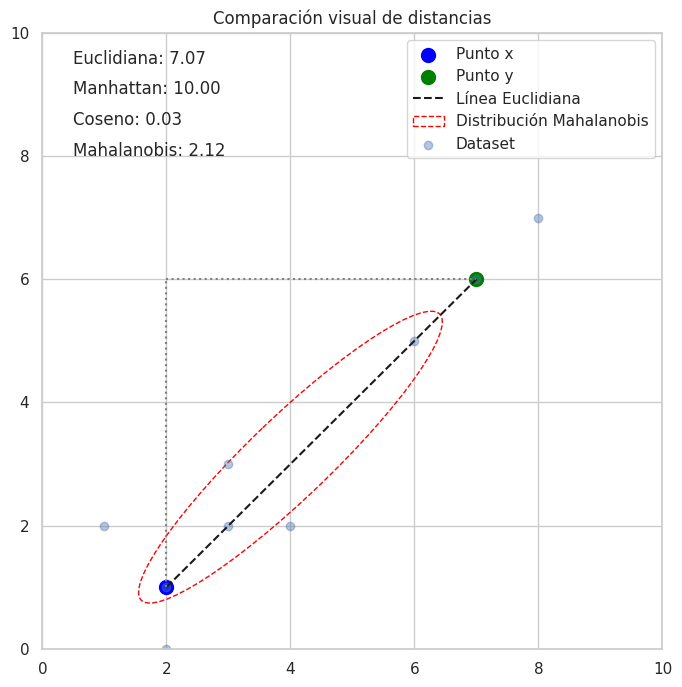

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial import distance
from matplotlib.patches import Ellipse

# Estilo visual
sns.set(style="whitegrid")

# Dos puntos en 2D
x = np.array([2, 1])
y = np.array([7, 6])

# Creamos un dataset de muestra para Mahalanobis
X = np.array([
    [1, 2],
    [2, 1],
    [3, 3],
    [4, 2],
    [6, 5],
    [7, 6],
    [2, 0],
    [3, 2],
    [8, 7]
])

# Calcular distancias
euclidean = distance.euclidean(x, y)
manhattan = distance.cityblock(x, y)
cosine = distance.cosine(x, y)

# Para Mahalanobis
cov = np.cov(X.T)
VI = np.linalg.inv(cov)
mahal = distance.mahalanobis(x, y, VI)

# Gráfico
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(*x, c='blue', label='Punto x', s=100)
ax.scatter(*y, c='green', label='Punto y', s=100)

# Línea Euclidiana
ax.plot([x[0], y[0]], [x[1], y[1]], 'k--', label='Línea Euclidiana')

# Dibujar cuadrícula tipo Manhattan
ax.vlines(x=x[0], ymin=x[1], ymax=y[1], linestyles='dotted', colors='gray')
ax.hlines(y=y[1], xmin=x[0], xmax=y[0], linestyles='dotted', colors='gray')

# Mostrar datos de referencia
ax.text(0.05, 0.95, f"Euclidiana: {euclidean:.2f}", transform=ax.transAxes)
ax.text(0.05, 0.90, f"Manhattan: {manhattan:.2f}", transform=ax.transAxes)
ax.text(0.05, 0.85, f"Coseno: {cosine:.2f}", transform=ax.transAxes)
ax.text(0.05, 0.80, f"Mahalanobis: {mahal:.2f}", transform=ax.transAxes)

# Dibujar elipse de Mahalanobis (intuitiva)
vals, vecs = np.linalg.eigh(cov)
order = vals.argsort()[::-1]
vals, vecs = vals[order], vecs[:, order]
theta = np.degrees(np.arctan2(*vecs[:, 0][::-1]))
width, height = 2 * np.sqrt(vals)

ellipse = Ellipse(xy=np.mean(X, axis=0), width=width, height=height, angle=theta,
                  edgecolor='red', facecolor='none', linestyle='--', label='Distribución Mahalanobis')

ax.add_patch(ellipse)

# Puntos del dataset
ax.scatter(X[:, 0], X[:, 1], alpha=0.4, label='Dataset')

ax.legend()
ax.set_title("Comparación visual de distancias")
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
plt.show()


Vemos:

Una línea punteada conectando los puntos (Euclidiana).

Líneas vertical y horizontal al estilo taxi (Manhattan).

Una elipse roja que representa la distribución de los datos: cuanto más "fuera" esté un punto respecto a esa forma, más alta será su distancia Mahalanobis.

#### **Elección de Métricas de Distancia**

La selección de la métrica de distancia adecuada depende de varios factores relacionados con los datos, el algoritmo y la interpretación.

---

*    ##### **1. Naturaleza de los datos**

| Tipo de datos                         | Métrica recomendada | Justificación                                         |
|-------------------------------------|--------------------|------------------------------------------------------|
| Datos continuos y escalares          | Euclidiana         | Captura la distancia geométrica real.                |
| Datos con diferentes escalas o correlaciones | Mahalanobis        | Considera varianza y correlación entre variables.    |
| Datos en alta dimensión o vectores orientados | Coseno             | Foco en la dirección más que la magnitud.            |
| Datos con valores dispersos o outliers | Manhattan          | Menos sensible a valores extremos.                    |
| Datos binarios o categóricos codificados | Jaccard, Hamming   | Métricas específicas para datos no continuos.        |

---

*    ##### **2. Propiedades geométricas y algoritmo**

| Algoritmo                | Sensibilidad a la métrica | Recomendación                         |
|-------------------------|---------------------------|-------------------------------------|
| K-Means                 | Alta                      | Usar Euclidiana (con escalado previo) |
| K-Medoids (PAM)         | Moderada                  | Puede usar Manhattan                  |
| DBSCAN, HDBSCAN         | Flexible                  | Depende del dominio y tipo de datos  |
| PCA                     | Basado en varianza        | Escalar con StandardScaler antes     |
| t-SNE / UMAP            | Basado en grafos          | Euclidiana o Coseno según contexto   |
| SVM (kernels)           | Indirecta                 | Métrica afecta el kernel elegido      |
| KNN y modelos basados en similitud | Muy alta                  | Elegir cuidadosamente la métrica      |

---

*    ##### **3. Escala y correlación entre variables**

- **Variables con escalas muy distintas**: siempre escalar (z-score o min-max).
- **Variables correlacionadas**: Mahalanobis captura mejor la forma del espacio.

---

*    ##### **4. Interpretabilidad y simplicidad**

| Métrica    | Intuición / Uso típico                          |
|------------|------------------------------------------------|
| Euclidiana | Distancia geométrica, fácil de visualizar      |
| Manhattan  | Distancia tipo “taxi” en una cuadrícula        |
| Coseno     | Similitud angular, útil en texto o vectores    |

---

*    ##### **5. Costo computacional**

| Métrica    | Costo computacional          |
|------------|-----------------------------|
| Euclidiana | Bajo                        |
| Manhattan  | Bajo                        |
| Coseno     | Medio                       |
| Mahalanobis| Alto (requiere invertir matriz de covarianza) |

---

*    ##### **Recomendaciones prácticas**

- Siempre **escalar los datos** si usas Euclidiana o Manhattan.
- Usa Mahalanobis si tienes suficientes datos y las variables están correlacionadas.
- Para alta dimensionalidad o vectores de texto, Coseno suele funcionar mejor.
- Realiza pruebas con distintas métricas y usa validación para elegir la mejor.
- Visualiza las distancias para entender su comportamiento en tu conjunto de datos.



### **Tipos comunes de algoritmos de clustering**

Exploraremos tres de los algoritmos de clustering más populares y relevantes para aplicaciones biomédicas: k-means, Clustering Jerárquico y DBSCAN.

#### **1. k-means**

##### **Concepto**

El algoritmo **k-means** es un método de clustering basado en centroides, sencillo y ampliamente utilizado. Su objetivo es particionar *n* observaciones en *k* grupos, donde cada observación se asigna al cluster cuyo centro (la media de los puntos en el cluster, llamado **centroide**) es el más cercano.

---

##### **¿Cómo funciona? (El Algoritmo Iterativo de Lloyd)**

1. **Inicialización:**  
   Se seleccionan *k* puntos aleatorios del conjunto de datos como centroides iniciales. Una estrategia común y mejorada es **k-means++**, que elige los centroides iniciales de manera inteligente para acelerar la convergencia y obtener mejores resultados.

2. **Asignación de Puntos:**  
   Cada punto de datos en el conjunto se asigna al centroide más cercano (usando, por ejemplo, la distancia Euclidiana). Esto forma *k* clusters iniciales.

3. **Actualización de Centroides:**  
   Una vez que todos los puntos han sido asignados, se recalculan los centroides de cada cluster como la media aritmética de todos los puntos actualmente asignados a ese cluster.

4. **Iteración:**  
   Los pasos 2 y 3 se repiten hasta que los centroides ya no cambian significativamente (convergen) o se alcanza un número máximo de iteraciones.

---

##### **Ventajas**

- **Eficiente y Escalable:**  
  Es uno de los algoritmos de clustering más rápidos para grandes conjuntos de datos, con una complejidad computacional de \(O(nkd)\) (donde *n* es el número de puntos, *k* el número de clusters y *d* la dimensionalidad).

- **Sencillo:**  
  Fácil de implementar y entender conceptualmente.

---

##### **Desventajas**

- **Necesita *k*:**  
  Requiere que especifiquemos el número de clusters (*k*) de antemano, lo cual a menudo no se conoce y es un desafío crucial.

- **Sensible a la inicialización:**  
  Puede converger a un óptimo local. `n_init` en scikit-learn ayuda a mitigar esto ejecutando el algoritmo varias veces con diferentes inicializaciones.

- **Forma de los clusters:**  
  Asume que los clusters son esféricos, convexos y de tamaño similar. No funciona bien con clusters de formas irregulares, interconectados o de densidades variadas.

- **Sensible a outliers:**  
  Los puntos atípicos pueden distorsionar los centroides, atrayéndolos hacia ellos y afectando la formación de clusters.

---

##### **Elección del Número Óptimo de *k* **

- **Método del Codo (Elbow Method):**  
  Grafica la Suma de Cuadrados de las Distancias Intra-cluster (SSE o inercia) para diferentes valores de *k*. Se busca el punto de "inflexión" o "codo" donde la mejora en la SSE disminuye drásticamente.

- **Silhouette Score:**  
  Lo veremos en la sección de evaluación. Busca el *k* que maximiza este score.

- **Conocimiento del Dominio:**  
  A menudo, el número de grupos ya es conocido por expertos en el campo (por ejemplo, si se espera un número específico de subtipos celulares o de enfermedades).

- **Métodos estadísticos:**  
  Existen pruebas más formales, como el Gap Statistic, aunque son más complejas de implementar.

---

##### **Ejemplo Práctico**

Agrupamiento de Tumores con k-means

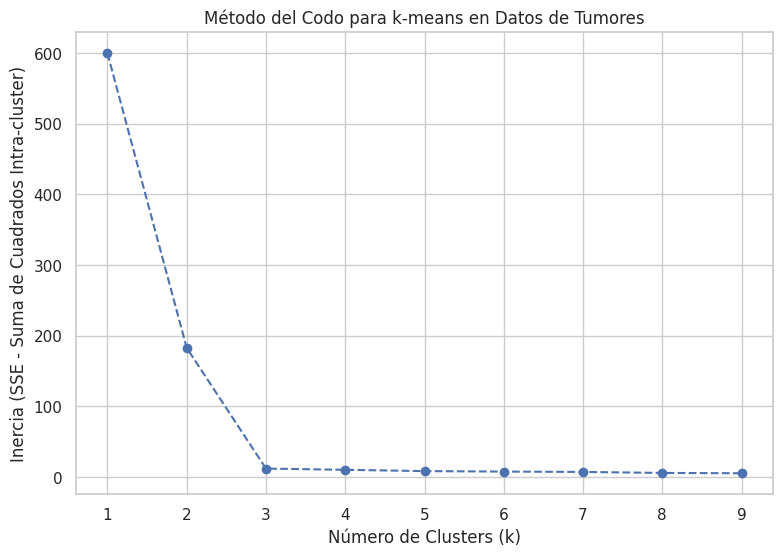

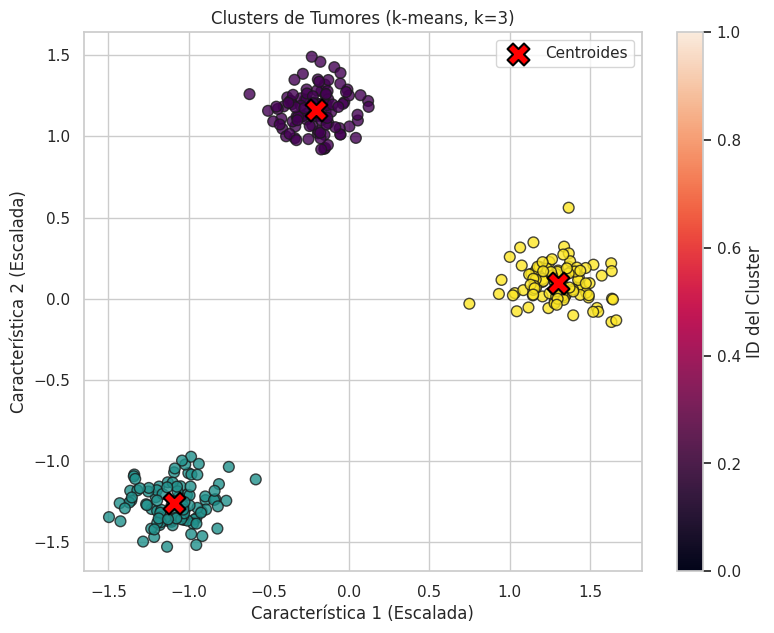

Número de puntos en cada cluster (k-means): [100 100 100]


In [6]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs # Para generar datos de ejemplo
from sklearn.preprocessing import StandardScaler # Para escalar los datos

# Generar un dataset de ejemplo que simule características de tumores
# Imaginemos 3 subtipos de tumores con 2 características (ej. tamaño y agresividad)
X_tumors, y_true_tumors = make_blobs(n_samples=300, centers=3, cluster_std=0.8, random_state=42)

# Escalado de los datos es crucial para k-means, ya que se basa en distancias
scaler_tumors = StandardScaler()
X_tumors_scaled = scaler_tumors.fit_transform(X_tumors)

# --- Método del Codo para encontrar el k óptimo ---
sse = [] # Sum of Squared Errors
k_range = range(1, 10) # Probaremos con 1 a 9 clusters

for k in k_range:
    # n_init='auto' para correr k-means múltiples veces con diferentes centroides iniciales
    # y elegir la mejor corrida, mitigando la sensibilidad a la inicialización.
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_tumors_scaled)
    sse.append(kmeans.inertia_) # inertia_ es la suma de cuadrados de las distancias al centroide

plt.figure(figsize=(9, 6))
plt.plot(k_range, sse, marker='o', linestyle='--')
plt.title('Método del Codo para k-means en Datos de Tumores')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia (SSE - Suma de Cuadrados Intra-cluster)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# --- Aplicar k-means con el k óptimo (supongamos que el codo está en k=3) ---
optimal_k_kmeans = 3
kmeans_model = KMeans(n_clusters=optimal_k_kmeans, random_state=42, n_init='auto')
clusters_kmeans = kmeans_model.fit_predict(X_tumors_scaled)

# --- Visualización de los clusters ---
plt.figure(figsize=(9, 7))
plt.scatter(X_tumors_scaled[:, 0], X_tumors_scaled[:, 1], c=clusters_kmeans, cmap='viridis', s=60, alpha=0.8, edgecolor='k')
plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1],
            marker='X', s=250, c='red', label='Centroides', linewidth=1.5, edgecolor='black')
plt.title(f'Clusters de Tumores (k-means, k={optimal_k_kmeans})')
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')
plt.colorbar(label='ID del Cluster')
plt.legend()
plt.grid(True)
plt.show()

print(f"Número de puntos en cada cluster (k-means): {np.bincount(clusters_kmeans)}")

**Comentarios del Código**

- **`make_blobs`**:  
  Es una función muy útil de `sklearn.datasets` para crear datasets sintéticos con grupos (clusters) bien definidos. Nos permite simular datos con una estructura clara para entender y visualizar cómo funcionan los algoritmos de clustering, antes de aplicarlos a datos reales, que suelen ser más ruidosos y menos definidos.

- **`StandardScaler`**:  
  ¡Esencial para k-means! Este algoritmo se basa en el cálculo de distancias entre puntos, por lo que si las características tienen diferentes escalas o unidades (por ejemplo, peso en kilogramos y altura en metros), las variables con rangos más amplios dominarán la medida de distancia. Esto puede sesgar el agrupamiento. El escalado mediante estandarización transforma los datos para que cada característica tenga media 0 y desviación estándar 1, asegurando que todas contribuyan por igual al cálculo de distancias.

- **`kmeans.inertia_`**:  
  Este atributo de la clase `KMeans` almacena la suma de los cuadrados de las distancias de cada punto a su centroide asignado, es decir, la inercia del modelo. El algoritmo k-means busca minimizar esta métrica para lograr clusters compactos y bien definidos. Por eso, al usar el método del codo, graficamos esta inercia en función de k para identificar un punto donde agregar más clusters no mejora significativamente la compactación.


####  **2. Clustering Jerárquico (Hierarchical Clustering**


**Concepto:**  
A diferencia de k-means, el clustering jerárquico (también conocido como HCA por *Hierarchical Cluster Analysis*) no requiere que se especifique el número de clusters de antemano. En su lugar, construye una jerarquía de clusters que puede visualizarse en un dendrograma, mostrando cómo los clusters se fusionan (o dividen) a diferentes niveles de similitud.




##### **Tipos Principales:**

- **Aglomerativo (Bottom-up):**  
  Es el tipo más común. Comienza con cada punto de datos como un cluster individual. Luego, fusiona iterativamente los dos clusters más cercanos hasta que todos los puntos pertenecen a un único cluster grande (o se alcanza un criterio de detención).

- **Divisivo (Top-down):**  
  Comienza con todos los puntos en un solo cluster y los divide recursivamente en sub-clusters hasta que cada punto es un cluster individual. Es menos común en la práctica.

---


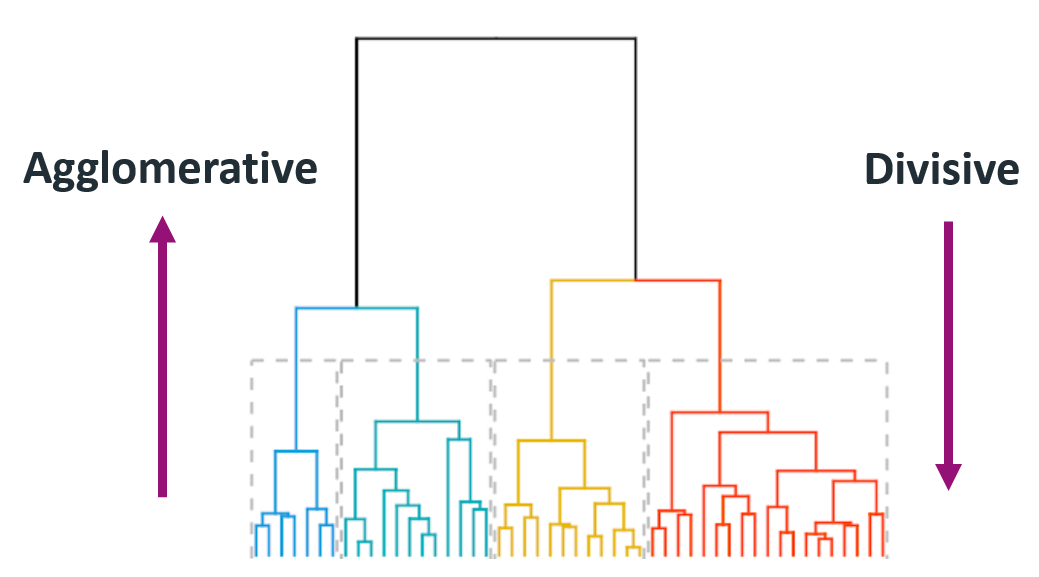


##### **Métricas de Enlace (Linkage):**

El "corazón" del clustering jerárquico aglomerativo es cómo se define la distancia entre dos clusters. Esto se conoce como la "métrica de enlace":

- **Single Linkage (Enlace Simple):**  
  La distancia entre dos clusters es la distancia mínima entre cualquier punto en un cluster y cualquier punto en el otro. Tiende a formar clusters alargados y a veces es sensible al ruido, pudiendo "encadenar" clusters.

- **Complete Linkage (Enlace Completo):**  
  La distancia entre dos clusters es la distancia máxima entre cualquier punto en un cluster y cualquier punto en el otro. Tiende a formar clusters más compactos y es menos sensible al ruido.

- **Average Linkage (Enlace Promedio):**  
  La distancia promedio entre todos los pares de puntos entre los dos clusters. Ofrece un buen balance entre los extremos de Single y Complete.

- **Ward's Method (Método de Ward):**  
  Frecuentemente usado y muy efectivo. Minimiza el aumento de la varianza total dentro de los clusters que se fusionan. Tiende a producir clusters más compactos y esféricos, similar a k-means en su búsqueda de mínima varianza intra-cluster. Es el método por defecto y recomendado para la mayoría de los casos.

---


##### **Visualización: Dendrograma**

Un dendrograma es un diagrama en forma de árbol que ilustra la jerarquía de fusiones (o divisiones) entre clusters. El eje vertical representa la distancia de la fusión. Al "cortar" el dendrograma a una altura particular, podemos obtener un número específico de clusters. La altura de corte es clave para definir los clusters.

---

##### **Ventajas**

- No necesita definir *k* previamente, lo cual es útil cuando no hay conocimiento previo.
- Proporciona una estructura jerárquica y visualización intuitiva de las relaciones entre clusters a diferentes niveles de granularidad, muy útil en biología (ej. árboles filogenéticos, clasificación de subgrupos celulares).
- Puede identificar clusters con formas arbitrarias, dependiendo de la métrica de enlace usada.

---

##### **Desventajas**

- Coste computacional alto para grandes datasets:  
  - O(n³) en algunos casos para la matriz de distancia,  
  - O(n² log n) o O(n²) para los métodos de enlace,  
  lo que lo hace menos escalable que k-means.
- Decisión rígida: Una vez que dos clusters se fusionan, esa decisión no puede revertirse en iteraciones posteriores.
- Interpretación subjetiva del dendrograma: La elección del "corte" para definir clusters puede ser arbitraria.

---

##### **Ejemplo Práctico: Agrupamiento Jerárquico de Expresión Génica**

Imaginemos que tenemos datos de expresión génica de varias muestras y queremos ver cómo se agrupan naturalmente para identificar posibles subtipos de enfermedades o respuestas a tratamientos.


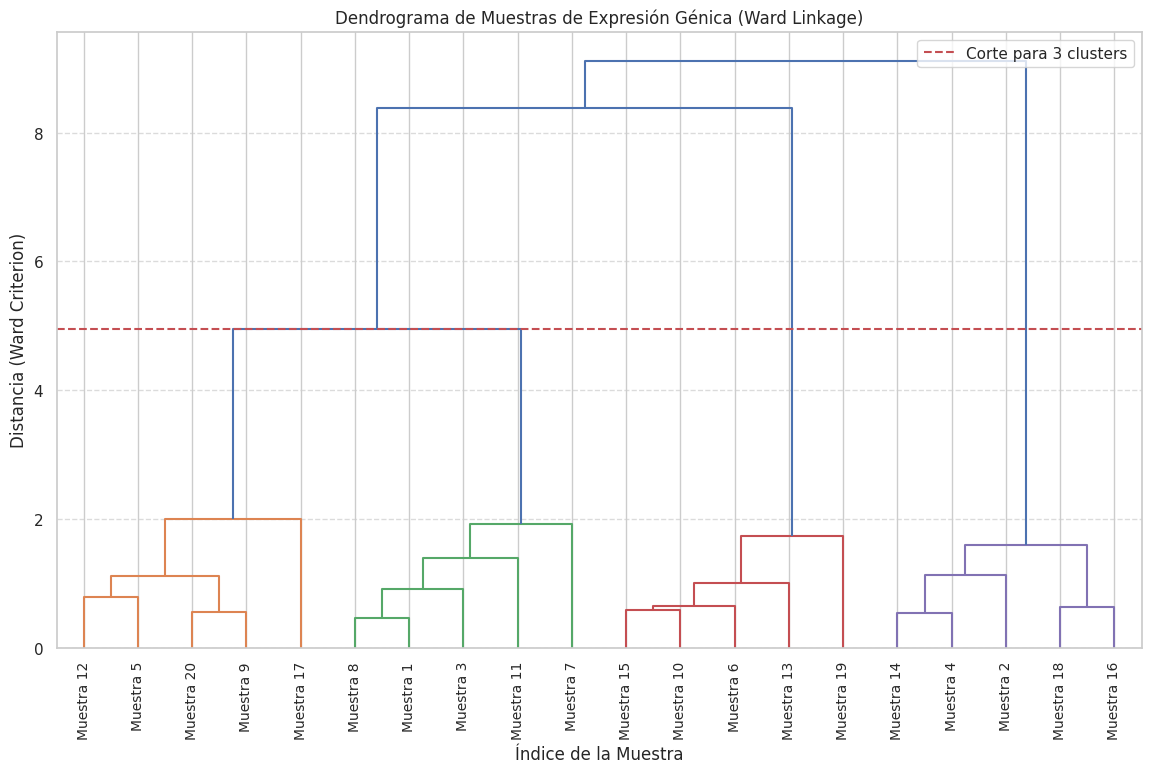

Clusters obtenidos con clustering jerárquico (3 clusters):
[3 1 3 1 3 2 3 3 3 2 3 3 2 1 2 1 3 1 2 3]
Número de muestras en cada cluster (jerárquico): [ 5  5 10]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Definir el número óptimo de clusters (puedes cambiarlo según el análisis previo)
optimal_k_kmeans = 3

# Generar un dataset de ejemplo que simule expresión génica
# 20 muestras, 5 genes (características)
X_genes, y_true_genes = make_blobs(n_samples=20, n_features=5, centers=4, cluster_std=1.5, random_state=42)

# Escalar los datos (es buena práctica para la mayoría de las métricas de distancia)
scaler_genes = StandardScaler()
X_genes_scaled = scaler_genes.fit_transform(X_genes)

# --- Construcción del dendrograma ---
# 'ward' linkage es una buena opción para empezar ya que busca minimizar la varianza intra-cluster
linked_matrix = linkage(X_genes_scaled, method='ward')

plt.figure(figsize=(14, 8))  # Aumentar el tamaño para mejor visualización
dendrogram(linked_matrix,
           orientation='top',  # Orientación del dendrograma
           distance_sort='descending',  # Ordenar ramas por distancia
           show_leaf_counts=True,  # Mostrar el número de puntos en cada hoja
           labels=[f'Muestra {i+1}' for i in range(len(X_genes_scaled))],  # Etiquetas para las hojas
           leaf_rotation=90,  # Rotar etiquetas para que no se superpongan
           leaf_font_size=10,  # Tamaño de la fuente de las etiquetas
           color_threshold=linked_matrix[-optimal_k_kmeans, 2] if optimal_k_kmeans > 1 else 0  # Colorear clusters
          )
plt.title('Dendrograma de Muestras de Expresión Génica (Ward Linkage)')
plt.xlabel('Índice de la Muestra')
plt.ylabel('Distancia (Ward Criterion)')
plt.axhline(y=linked_matrix[-optimal_k_kmeans, 2] if optimal_k_kmeans > 1 else 0, color='r', linestyle='--', label=f'Corte para {optimal_k_kmeans} clusters')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# --- Obtener los clusters a partir del dendrograma ---
# Cortar el dendrograma para obtener un número específico de clusters
# Usaremos el mismo k óptimo (3) que encontramos con k-means para fines de demostración
clusters_hierarchical = fcluster(linked_matrix, optimal_k_kmeans, criterion='maxclust')

print(f"Clusters obtenidos con clustering jerárquico ({optimal_k_kmeans} clusters):")
print(clusters_hierarchical)
print(f"Número de muestras en cada cluster (jerárquico): {np.bincount(clusters_hierarchical)[1:]}")


**Comentarios del Código**

- **linkage**:  
  Esta función de `scipy.cluster.hierarchy` es el corazón del clustering jerárquico.  
  Toma los datos y el método de enlace para construir la **matriz de enlace**, que es la base del dendrograma.

- **dendrogram**:  
  Visualiza la matriz de enlace.  
  Los parámetros `orientation`, `distance_sort`, `show_leaf_counts`, `labels`, `leaf_rotation`, `leaf_font_size` son clave para hacer el dendrograma legible.  
  `color_threshold` ayuda a visualizar los clusters al cortar el dendrograma a cierta distancia.

- **fcluster**:  
  Permite extraer los clusters a partir del dendrograma.  
  Se puede cortar por una distancia usando `criterion='distance'` o especificando directamente el número de clusters deseado con `criterion='maxclust'`.


#### **3. DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

**Concepto**

DBSCAN es un algoritmo de clustering basado en la **densidad**.  
A diferencia de k-means, no requiere que se especifique el número de clusters de antemano y es notablemente capaz de encontrar clusters de formas arbitrarias, además de identificar explícitamente puntos de ruido (outliers) que no pertenecen a ningún cluster.  
Es particularmente útil en datos con variaciones de densidad o donde los outliers son importantes (ej., detección de enfermedades raras).

---

##### **¿Cómo funciona? (La Lógica de la Densidad)**

DBSCAN define los clusters como regiones de **alta densidad** separadas por regiones de **baja densidad**. Se basa en la noción de "vecindad" y "densidad".  
Requiere dos parámetros clave, que son fundamentales para su funcionamiento:

- **eps (epsilon)**:  
  El radio máximo de la vecindad para considerar dos puntos como "vecinos".  
  Si la distancia entre dos puntos es menor o igual a eps, se consideran vecinos.

- **min_samples**:  
  El número mínimo de puntos requeridos dentro de la vecindad eps de un punto para que ese punto sea considerado un punto central (core point).

---

##### **Tipos de Puntos**

- **Core Point (Punto Central)**:  
  Un punto que tiene al menos `min_samples` puntos (incluido él mismo) dentro de su vecindad de radio eps.  
  Estos puntos forman el "núcleo" de un cluster.

- **Border Point (Punto Fronterizo)**:  
  Un punto que está dentro de la vecindad de un core point, pero no tiene suficientes vecinos para ser un core point él mismo.  
  Son los "bordes" de los clusters.

- **Noise Point (Punto de Ruido / Outlier)**:  
  Un punto que no es un core point ni un border point.  
  Estos puntos se consideran ruido y no se asignan a ningún cluster (se les da la etiqueta -1).

---

##### **Funcionamiento**

El algoritmo funciona expandiendo clusters desde los core points, conectando core points que son vecinos y arrastrando consigo a los border points.

---

##### **Ventajas**

- **No necesita k**: No requiere que se defina el número de clusters, lo que es una gran ventaja en la exploración de datos.
- **Formas Arbitrarias**: Puede encontrar clusters de formas complejas y no convexas, algo que k-means no puede hacer.
- **Robusto al Ruido**: Identifica explícitamente los puntos de ruido, lo cual es muy útil en datos biomédicos ruidosos o para la detección de anomalías.

---

##### **Desventajas**

- **Sensibilidad a Parámetros**: La elección de eps y min_samples puede ser complicada y es crucial para el rendimiento. Pequeñas variaciones pueden cambiar drásticamente los resultados.
- **Densidades Variables**: No funciona bien si los clusters tienen densidades muy diferentes (un eps que funciona para un cluster denso puede unir clusters dispersos, o viceversa).
- **Escalado de Datos**: Al igual que k-means, es sensible a la escala de los datos ya que se basa en distancias.

---

##### **Estrategias para Elegir eps y min_samples**

- **min_samples**: Un valor común es `2 × dimensionalidad de los datos`.
- **eps**: Se puede estimar usando un gráfico de la distancia del vecino k-ésimo más cercano (k-dist plot) para encontrar el "codo" donde las distancias comienzan a aumentar bruscamente.

---

##### **Ejemplo Práctico: Detección de Agrupaciones en Imágenes Médicas (simplificado)**

Imaginemos que tenemos características extraídas de imágenes médicas, y queremos identificar agrupaciones de píxeles o regiones con características similares, potencialmente con ruido.


/tmp/ipython-input-10-1234315838.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors_dbscan = plt.cm.get_cmap('tab20', len(unique_labels_dbscan))


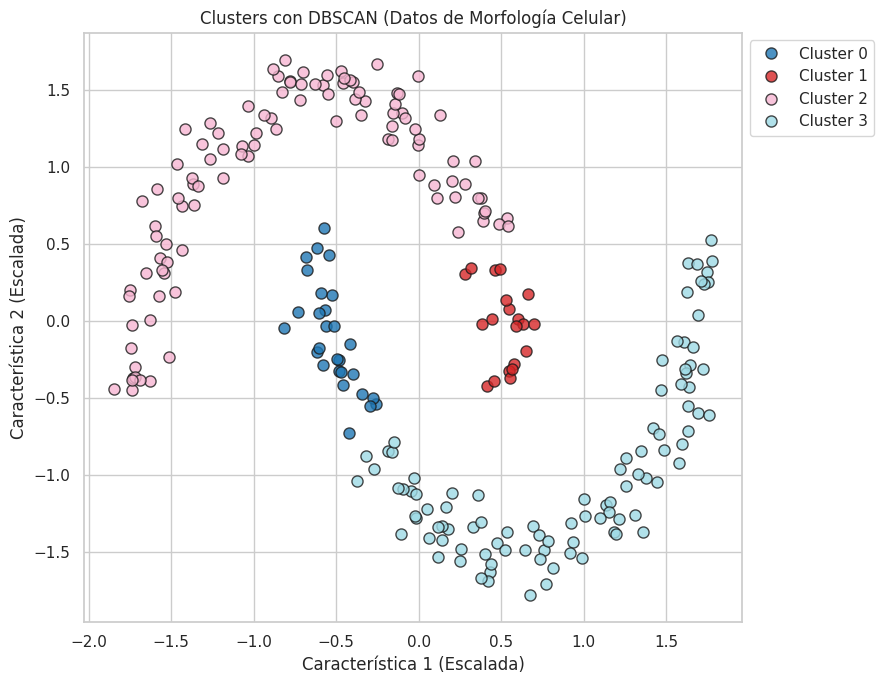

Clusters encontrados por DBSCAN: [0 1 2 3]
Número de clusters (excluyendo ruido): 4


In [10]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons # Para un ejemplo con formas no esféricas

# Generar un dataset de ejemplo con formas no esféricas (ej. células de morfología particular)
X_moons, y_true_moons = make_moons(n_samples=250, noise=0.07, random_state=42) # Aumentamos el ruido un poco
# Escalar los datos es buena práctica para DBSCAN
scaler_moons = StandardScaler()
X_moons_scaled = scaler_moons.fit_transform(X_moons)

# --- Aplicar DBSCAN ---
# Experimentar con eps y min_samples. Estos valores son cruciales.
# Un buen punto de partida para eps puede ser la distancia del vecino k-ésimo más cercano.
dbscan_model = DBSCAN(eps=0.25, min_samples=6) # Ajusta estos valores para ver el efecto
clusters_dbscan = dbscan_model.fit_predict(X_moons_scaled)

# --- Visualización de los clusters ---
plt.figure(figsize=(9, 7))
# Los puntos de ruido se asignan al cluster -1
unique_labels_dbscan = np.unique(clusters_dbscan)
# Usar un colormap que tenga suficientes colores para los clusters + negro para ruido
colors_dbscan = plt.cm.get_cmap('tab20', len(unique_labels_dbscan))

for k, col_idx in zip(unique_labels_dbscan, range(len(unique_labels_dbscan))):
    if k == -1:
        # Puntos de ruido en negro y con un marcador diferente
        color = 'black'
        marker = 'x'
        label = 'Ruido'
    else:
        color = colors_dbscan(col_idx)
        marker = 'o'
        label = f'Cluster {k}'

    class_member_mask = (clusters_dbscan == k)
    xy = X_moons_scaled[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], marker, markerfacecolor=color,
             markeredgecolor='k', markersize=8, label=label, alpha=0.8)

plt.title('Clusters con DBSCAN (Datos de Morfología Celular)')
plt.xlabel('Característica 1 (Escalada)')
plt.ylabel('Característica 2 (Escalada)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1)) # Colocar leyenda fuera del gráfico
plt.grid(True)
plt.tight_layout() # Ajustar el diseño para que todo quepa
plt.show()

print(f"Clusters encontrados por DBSCAN: {np.unique(clusters_dbscan)}")
print(f"Número de clusters (excluyendo ruido): {len(np.unique(clusters_dbscan[clusters_dbscan != -1]))}")
if -1 in unique_labels_dbscan:
    noise_points = np.sum(clusters_dbscan == -1)
    print(f"Número de puntos de ruido: {noise_points}")


**Comentarios del Código**

- **make_moons**: Genera un conjunto de datos con forma de "lunas" entrelazadas. Este dataset es difícil de agrupar con k-means debido a su forma no esférica, pero es ideal para demostrar las capacidades de DBSCAN.

- **Visualización de clusters y ruido**: En la gráfica, los puntos clasificados como ruido (etiqueta `-1`) se representan con un color negro y un marcador distintivo para diferenciarlos claramente de los clusters detectados.


## **Evaluación del Clustering**

Evaluar la calidad de los clusters en el aprendizaje no supervisado es un desafío particular porque, por definición, no tenemos etiquetas verdaderas ("ground truth") para comparar. Sin embargo, existen métricas intrínsecas (también llamadas métricas de "validez interna") que nos ayudan a cuantificar cuán bien formados están los clusters basándose únicamente en la estructura de los datos y las asignaciones de clusters.

El objetivo general de estas métricas es evaluar dos aspectos clave:

- **Cohesión (Compactness):**  
  ¿Cuán juntos están los puntos dentro de un mismo cluster? Clusters compactos son deseables.

- **Separación (Separability):**  
  ¿Cuán separados están los diferentes clusters entre sí? Clusters bien separados son deseables.


### **1. Silhouette Score**

El Silhouette Score es una de las métricas más populares y fácilmente interpretables. Mide cuán similar es un objeto a su propio cluster (cohesión) en comparación con otros clusters (separación). Su valor oscila entre -1 y +1:

- Un valor cercano a **+1** indica que el objeto está bien agrupado, es decir, está muy similar a los objetos de su propio cluster y muy disimilar de los objetos de otros clusters.
- Un valor cercano a **0** indica que el objeto está muy cerca del límite entre dos clusters, sugiriendo un solapamiento o una asignación ambigua.
- Un valor cercano a **-1** indica que el objeto ha sido probablemente asignado al cluster incorrecto, ya que es más similar a un cluster vecino que a su propio cluster.

Para un conjunto de datos, se calcula la media de los scores de silhouette de cada punto. Un score promedio alto (cercano a 1) indica un buen clustering.

---

**Fórmula (para un punto i):**

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

Donde:

- \( a(i) \): Distancia promedio del punto \( i \) a todos los otros puntos en el mismo cluster.
- \( b(i) \): Distancia promedio del punto \( i \) a todos los puntos en el cluster vecino más cercano (el cluster al que \( i \) no pertenece, pero que está más cerca en promedio).

---

**Ventajas:**

- Intuitivo: Fácil de entender su significado.
- Compara configuraciones: Útil para comparar diferentes números de clusters (\(k\)) o diferentes algoritmos en el mismo dataset.

**Desventajas:**

- Costoso computacionalmente: Puede ser lento para grandes datasets, ya que implica calcular distancias entre todos los puntos.
- No para todas las formas: Su asunción de clusters convexos o densos puede no ser adecuada para clusters de formas muy irregulares (donde DBSCAN brillaría).
- Sensible a la densidad: Puede fallar en clusters con densidades muy diferentes.


### **2. Calinski-Harabasz Index (Variance Ratio Criterion)**

El Calinski-Harabasz Index (también conocido como Variance Ratio Criterion) evalúa la razón entre la dispersión inter-cluster (cuán separados están los centroides de los clusters entre sí) y la dispersión intra-cluster (cuán compactos son los clusters individualmente). Un valor más alto generalmente indica clusters mejor definidos y separados.

---

**Fórmula:**

$$
CH = \frac{SS_B / (k - 1)}{SS_W / (n_E - k)}
$$

Donde:

- \(SS_B\) es la suma de cuadrados entre clusters.
- \(SS_W\) es la suma de cuadrados dentro de clusters.
- \(n_E\) es el número total de puntos.
- \(k\) es el número de clusters.

---

**Ventajas:**

- Rápido de calcular: Más eficiente que el Silhouette Score.
- Bueno para clusters esféricos: Funciona bien cuando los clusters son aproximadamente esféricos y bien definidos.

**Desventajas:**

- Sesgo a clusters convexos: Tiende a favorecer un mayor número de clusters incluso si no hay una estructura natural clara. Recordar: Un conjunto es convexo si, para cualquier par de puntos dentro del conjunto, el segmento de línea recta que los une también está completamente contenido dentro del conjunto.



### **3. Davies-Bouldin Index**

El Davies-Bouldin Index mide la similitud promedio entre cada cluster y su cluster más similar, donde la similitud se define como una razón entre las dispersiones intra-cluster y la distancia inter-cluster. Un valor más bajo indica un mejor clustering.

$$
DB = \frac{1}{k} \sum_{i=1}^k \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right)
$$

Donde:
- \(\sigma_i\) es el tamaño (diámetro) del cluster \(i\),
- \(d(c_i, c_j)\) es la distancia entre los centroides de los clusters \(i\) y \(j\),
- \(k\) es el número de clusters.

---

**Ventajas:**

- Evalúa la superposición: Penaliza clusters superpuestos o pobremente separados.
- Independiente de la métrica: Funciona con cualquier métrica de distancia.

**Desventajas:**

- Sensible a la forma de los clusters: Asume clusters esféricos o elípticos.

---




### **Consideraciones Importantes sobre la Evaluación:**

- **Ninguna métrica es perfecta:** Cada métrica tiene sus propias suposiciones y fortalezas. A menudo, es mejor usar varias métricas y combinarlas con inspección visual y conocimiento del dominio.
- **Contexto es clave:** La "mejor" agrupación no siempre es la que obtiene el mejor score matemático, sino la que tiene más sentido biológico o médico para el problema en cuestión.
- **No para ruido:** El Silhouette Score, Calinski-Harabasz y Davies-Bouldin Index no se pueden calcular si hay puntos de ruido (cluster -1 en DBSCAN) o si solo hay un cluster, ya que necesitan una asignación clara a clusters.

---

### **Ejemplo Práctico: Evaluación de Clusters**

Vamos a evaluar los clusters obtenidos con k-means usando estas métricas.

Silhouette Score para k-means con 3 clusters: 0.878
Calinski-Harabasz Index para k-means con 3 clusters: 7351.611 (Mayor es mejor)
Davies-Bouldin Index para k-means con 3 clusters: 0.169 (Menor es mejor)


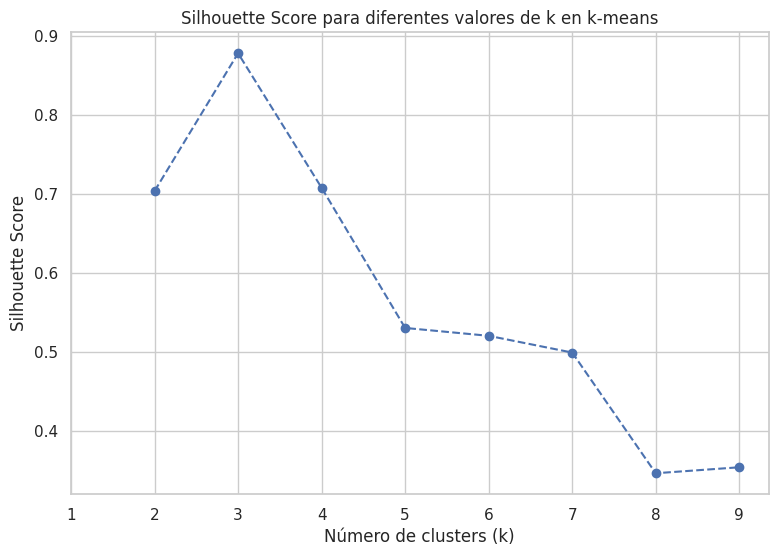

El valor de k con el Silhouette Score más alto es: 3 (Score: 0.878)


In [12]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Supongamos que:
# - X_tumors_scaled es el dataset ya escalado.
# - clusters_kmeans son las etiquetas obtenidas con k-means para un k óptimo dado (optimal_k_kmeans).
# - k_range es el rango de k a evaluar, por ejemplo range(1,10).

# Evaluación de métricas para k-means con el número óptimo de clusters
if len(np.unique(clusters_kmeans)) > 1:
    silhouette_avg = silhouette_score(X_tumors_scaled, clusters_kmeans)
    calinski_harabasz_avg = calinski_harabasz_score(X_tumors_scaled, clusters_kmeans)
    davies_bouldin_avg = davies_bouldin_score(X_tumors_scaled, clusters_kmeans)

    print(f"Silhouette Score para k-means con {optimal_k_kmeans} clusters: {silhouette_avg:.3f}")
    print(f"Calinski-Harabasz Index para k-means con {optimal_k_kmeans} clusters: {calinski_harabasz_avg:.3f} (Mayor es mejor)")
    print(f"Davies-Bouldin Index para k-means con {optimal_k_kmeans} clusters: {davies_bouldin_avg:.3f} (Menor es mejor)")
else:
    print("No se pueden calcular métricas con un solo cluster o sin clusters.")

# Evaluación del Silhouette Score para diferentes valores de k
silhouette_scores_k = []
for k in k_range:
    if k == 1:
        # Silhouette Score no se puede calcular para k=1, asignamos NaN para evitar confusión visual
        silhouette_scores_k.append(np.nan)
        continue

    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    clusters_k = kmeans.fit_predict(X_tumors_scaled)
    score = silhouette_score(X_tumors_scaled, clusters_k)
    silhouette_scores_k.append(score)

# Visualización del Silhouette Score vs número de clusters k
plt.figure(figsize=(9, 6))
plt.plot(k_range, silhouette_scores_k, marker='o', linestyle='--', color='b')
plt.title('Silhouette Score para diferentes valores de k en k-means')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Encontrar el mejor k basado en el Silhouette Score (ignorando posibles NaN)
valid_scores = [(k, s) for k, s in zip(k_range, silhouette_scores_k) if not np.isnan(s)]
best_k_silhouette, best_score = max(valid_scores, key=lambda x: x[1])

print(f"El valor de k con el Silhouette Score más alto es: {best_k_silhouette} (Score: {best_score:.3f})")


**Comentarios del Código**

- Las funciones `silhouette_score`, `calinski_harabasz_score` y `davies_bouldin_score` se importan directamente de `sklearn.metrics`. Son fáciles de usar: solo necesitan los datos y las etiquetas de los clusters.

- La gráfica del Silhouette Score vs. número de clusters \(k\) es una herramienta valiosa para validar la elección de \(k\), complementando el método del codo. En esta gráfica, se busca el pico más alto para determinar el mejor número de clusters.


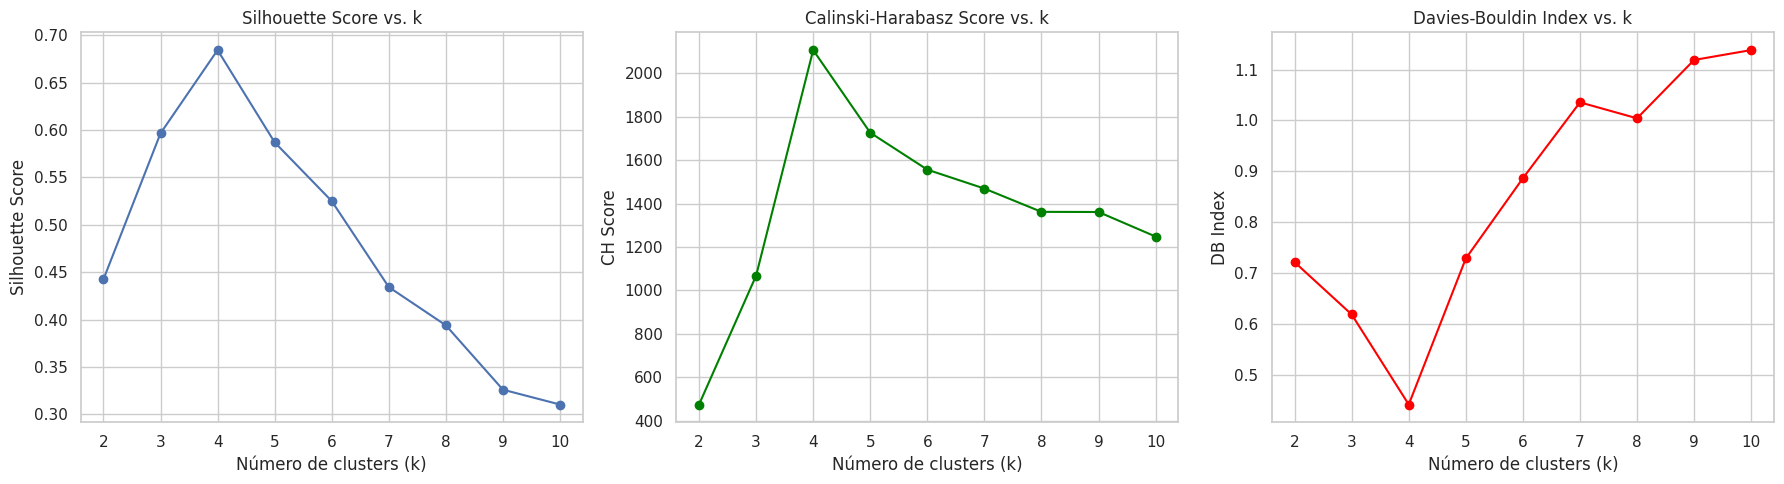

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Generar datos simulados
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=0.6, random_state=0)

# Rangos de k a probar
k_values = range(2, 11)

# Inicializar listas para guardar métricas
silhouette_scores = []
calinski_scores = []
davies_scores = []

# Evaluar cada k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)

    silhouette = silhouette_score(X, labels)
    calinski = calinski_harabasz_score(X, labels)
    davies = davies_bouldin_score(X, labels)

    silhouette_scores.append(silhouette)
    calinski_scores.append(calinski)
    davies_scores.append(davies)

# Graficar los resultados
plt.figure(figsize=(18, 5))

# Silhouette Score
plt.subplot(1, 3, 1)
plt.plot(k_values, silhouette_scores, marker='o')
plt.title("Silhouette Score vs. k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("Silhouette Score")

# Calinski-Harabasz
plt.subplot(1, 3, 2)
plt.plot(k_values, calinski_scores, marker='o', color='green')
plt.title("Calinski-Harabasz Score vs. k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("CH Score")

# Davies-Bouldin (recuerda: menor es mejor)
plt.subplot(1, 3, 3)
plt.plot(k_values, davies_scores, marker='o', color='red')
plt.title("Davies-Bouldin Index vs. k")
plt.xlabel("Número de clusters (k)")
plt.ylabel("DB Index")

plt.tight_layout()
plt.show()


**¿Cómo interpretar los resultados?**
*   **Silhouette Score:** Busca el pico más alto → mejor combinación de cohesión y separación.

*   **Calinski-Harabasz:** También quieres un valor alto.

*   **Davies-Bouldin:** Aquí buscas un valor bajo, indica clusters bien separados y compactos.

---

---

# **3. Reducción de la Dimensionalidad**

En muchos *datasets* biológicos y médicos, nos encontramos con una cantidad abrumadora de características o variables (decenas de miles de genes en un experimento de transcriptómica, cientos de características en imágenes histopatológicas). Trabajar con tanta dimensionalidad presenta desafíos significativos, a menudo denominados la **Maldición de la Dimensionalidad**:

**Problemas de la Alta Dimensionalidad**

- **Esparsidad del Espacio**: A medida que aumenta la dimensionalidad, el volumen del espacio de datos crece exponencialmente, haciendo que los datos se vuelvan increíblemente dispersos. Los puntos de datos se vuelven "solitarios", y la noción de distancia y densidad se vuelve menos significativa.

- **Dificultad de Modelado**: Muchos algoritmos de *machine learning* se vuelven ineficientes o incluso fallan en encontrar patrones significativos en espacios de alta dimensión. La cantidad de datos necesarios para cubrir el espacio crece exponencialmente.

- **Visualización Imposible**: Es prácticamente imposible visualizar datos en más de 3 dimensiones, lo que limita la exploración visual de la estructura de los datos.

- **Ruido y Redundancia**: Muchas dimensiones pueden ser irrelevantes o altamente correlacionadas con otras, introduciendo ruido y redundancia que pueden confundir a los algoritmos y llevar a un sobreajuste.

- **Costo Computacional**: La memoria y el tiempo de computación aumentan drásticamente con la dimensionalidad.

---

## **¿Qué es la Reducción de la Dimensionalidad?**

La **Reducción de la Dimensionalidad** es el proceso de transformar datos de un espacio de alta dimensión a un espacio de menor dimensión, mientras se intenta preservar la mayor cantidad de información relevante posible. Esto es crucial para la exploración de datos, la visualización, y como paso de preprocesamiento para otros modelos de *machine learning*.

---

## **Enfoques de Reducción de Dimensionalidad**

### **1. Selección de Características (*Feature Selection*)**

Se trata de elegir un subconjunto de las características originales más relevantes para el problema (ej., seleccionar genes que muestran la mayor variabilidad o discriminación entre grupos).  
Los métodos incluyen:

- **Filtrado** (basado en estadísticas simples),
- **Envoltura** (usando un modelo de ML para evaluar subconjuntos),
- **Incrustados** (inherentes al modelo, como en árboles de decisión).

### **2. Extracción de Características (*Feature Extraction*)**

Se transforman las características originales en un nuevo conjunto de características de menor dimensión. Estas nuevas características son combinaciones o proyecciones de las originales y no son necesariamente interpretables directamente.  
Ejemplos comunes:

- **PCA** (Análisis de Componentes Principales)
- **t-SNE** (t-distributed Stochastic Neighbor Embedding)
- **UMAP** (Uniform Manifold Approximation and Projection)

Este enfoque es especialmente útil cuando la información está distribuida a través de múltiples características.

---

Nos centraremos en las **técnicas de extracción de características**, que son las más usadas para la **visualización** y el **preprocesamiento** de datos complejos en el ámbito biomédico.


## **1. PCA (Principal Component Analysis - Análisis de Componentes Principales)**

**Concepto**

**PCA** es una técnica **lineal** de reducción de la dimensionalidad. Su objetivo es encontrar un nuevo conjunto de características, llamadas **Componentes Principales (PCs)**, que son combinaciones lineales de las características originales.

Estas PCs son **ortogonales** (no correlacionadas entre sí) y están ordenadas de tal manera que:

- La **primera PC** captura la mayor cantidad de varianza total en los datos.
- La **segunda PC** captura la segunda mayor cantidad de varianza, en una dirección ortogonal a la primera.
- Y así sucesivamente.

---

### ¿Cómo funciona? (La Geometría de la Proyección)

1. **Centrar los Datos**  
   Se resta la media de cada característica a todos los datos, de modo que el centro de los datos se encuentre en el origen. Este es un paso crucial.

2. **Calcular la Matriz de Covarianza (o de Correlación)**  
   Esta matriz describe las relaciones (covarianza) entre todos los pares de características. Es el punto de partida para encontrar las direcciones de mayor varianza.

3. **Descomposición en Eigenvalores y Eigenvectores**  
   - Los **vectores propios** (eigenvectors) representan las direcciones o ejes de las componentes principales (las nuevas dimensiones).
   - Los **valores propios** (eigenvalues) indican la magnitud de la varianza explicada por cada eje.

4. **Seleccionar Componentes**  
   Se seleccionan las *k* componentes principales correspondientes a los *k* valores propios más grandes.  
   Los datos originales se proyectan sobre estos nuevos ejes, creando un nuevo espacio de menor dimensión.

---

### Interpretación y Usos

- La **PC1** representa la dirección de máxima variabilidad en los datos.
- Las PCs siguientes capturan la máxima varianza restante en direcciones ortogonales.
- **Usos comunes**:
  - **Reducción de ruido**, descartando componentes de baja varianza.
  - **Visualización en 2D o 3D**, facilitando la interpretación de datos de alta dimensión.
  - **Interpretación biológica**: los *loadings* (cargas) pueden indicar qué variables (genes, por ejemplo) contribuyen más a cada componente.

---

### Ventajas

- **Eficiencia**: Es un algoritmo lineal rápido y escalable.
- **Interpretabilidad limitada**: Los *loadings* pueden ser informativos.
- **Captura de máxima varianza**: Las primeras PCs explican la mayor parte de la variabilidad.

---

### Desventajas

- **Linealidad**: No detecta estructuras no lineales.
- **Pérdida de información**: Puede ignorar señales importantes de baja varianza.
- **Sensible a *outliers***: Los valores atípicos pueden distorsionar los resultados.
- **Sensible al escalado**: Es necesario normalizar las variables.

---

### Ejemplo Práctico: PCA en un Dataset de Expresión Génica (Datos de Cáncer)

Aplicaremos PCA al **Wisconsin Breast Cancer dataset**, que contiene 30 características numéricas relacionadas con núcleos celulares, para reducir la dimensionalidad y visualizar los datos en 2D.

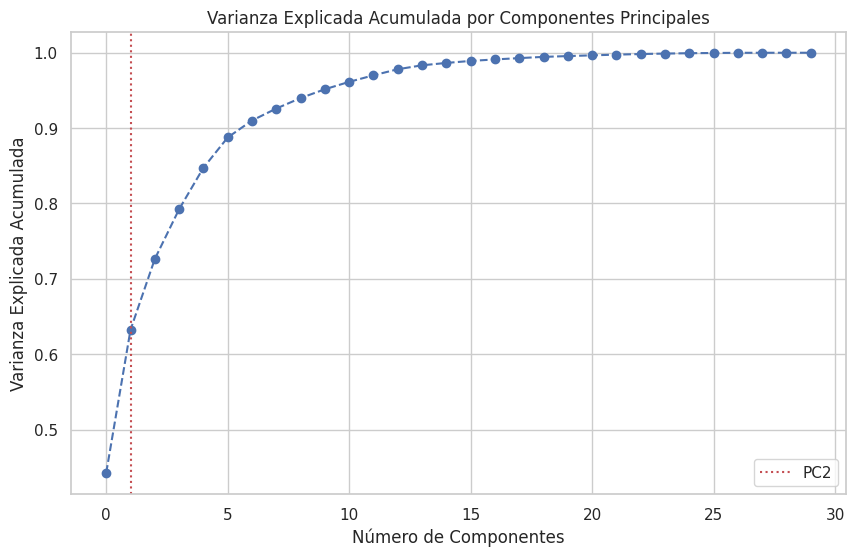

Varianza explicada por la primera componente principal: 44.27%
Varianza explicada por las primeras 2 componentes acumuladas: 63.24%


/tmp/ipython-input-15-1079406399.py:53: UserWarning: Mismatched number of handles and labels: len(handles) = 1 len(labels) = 2
  plt.legend(handles=handles[1:], labels=[target_names_cancer[0], target_names_cancer[1]], title='Tipo de Tumor')


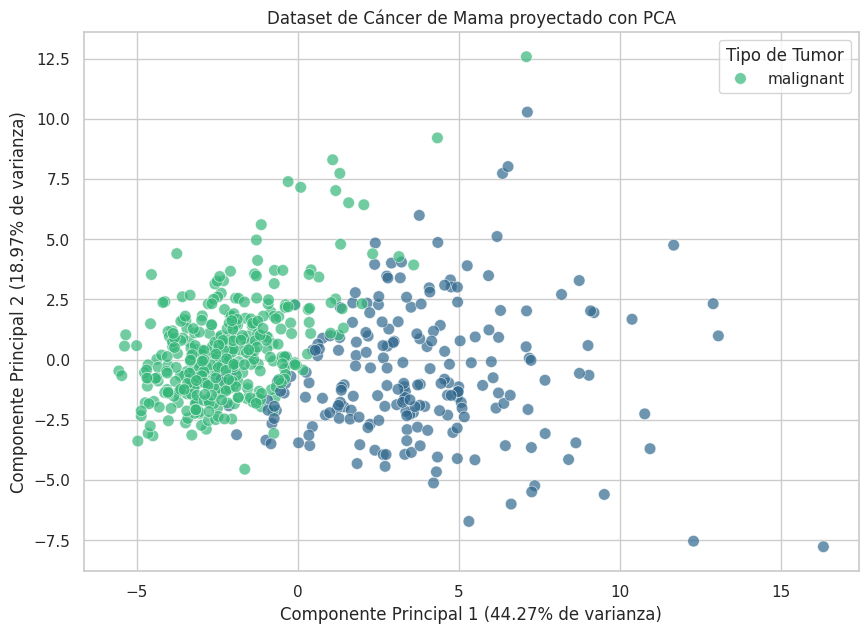


Top 5 características con mayor contribución (magnitud absoluta) a PC1:
mean concave points     0.260854
mean concavity          0.258400
worst concave points    0.250886
mean compactness        0.239285
worst perimeter         0.236640
Name: PC1, dtype: float64

Top 5 características con mayor contribución (magnitud absoluta) a PC2:
mean fractal dimension     0.366575
fractal dimension error    0.280092
worst fractal dimension    0.275339
mean radius                0.233857
compactness error          0.232716
Name: PC2, dtype: float64


In [15]:
from sklearn.decomposition import PCA
import seaborn as sns # Para visualizaciones más atractivas
from sklearn.datasets import load_breast_cancer

# Cargar el dataset de cáncer de mama (Wisconsin Breast Cancer dataset)
data_cancer = load_breast_cancer()
X_cancer = data_cancer.data
y_cancer = data_cancer.target # Etiquetas que no usaremos para PCA en sí, pero sí para colorear la visualización
feature_names_cancer = data_cancer.feature_names
target_names_cancer = data_cancer.target_names

# Escalar los datos es CRUCIAL para PCA
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)

# --- Aplicar PCA ---
# Reducir a 2 componentes principales para visualización
pca = PCA(n_components=2, random_state=42) # random_state para reproducibilidad si hay ambigüedad
X_pca = pca.fit_transform(X_cancer_scaled)

# --- Visualización de la Varianza Explicada ---
# Es importante ver cuánta varianza explican las componentes para decidir cuántas conservar.
pca_full = PCA()
pca_full.fit(X_cancer_scaled)
explained_variance_ratio = pca_full.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada Acumulada por Componentes Principales')
plt.grid(True)
plt.axvline(x=1, color='r', linestyle=':', label='PC2') # Línea para 2 componentes (índice 1 para la segunda PC)
plt.legend()
plt.show()

print(f"Varianza explicada por la primera componente principal: {pca.explained_variance_ratio_[0]*100:.2f}%")
print(f"Varianza explicada por las primeras 2 componentes acumuladas: {pca.explained_variance_ratio_.sum()*100:.2f}%")

# --- Visualización de los datos en el nuevo espacio PCA ---
plt.figure(figsize=(10, 7))
# Coloreamos por las etiquetas originales para ver si PCA ayuda a separarlas
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_cancer, palette='viridis',
                alpha=0.7, s=70, edgecolor='w', linewidth=0.5,
                hue_order=np.unique(y_cancer),
                legend='full')

plt.title('Dataset de Cáncer de Mama proyectado con PCA')
plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}% de varianza)')
plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}% de varianza)')
# Para las leyendas de tipo de tumor, es mejor usar labels de los target_names originales
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=[target_names_cancer[0], target_names_cancer[1]], title='Tipo de Tumor')
plt.grid(True)
plt.show()

# Opcional: Visualizar los 'loadings' de las características originales en las PCs
# Esto puede ser muy informativo en datos biológicos para ver qué genes/características impulsan la variación.
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=feature_names_cancer)
print("\nTop 5 características con mayor contribución (magnitud absoluta) a PC1:")
print(loadings['PC1'].abs().sort_values(ascending=False).head())
print("\nTop 5 características con mayor contribución (magnitud absoluta) a PC2:")
print(loadings['PC2'].abs().sort_values(ascending=False).head())

**Comentarios del Código**

- **`load_breast_cancer`**:  
  Es un dataset clásico incluido en `sklearn.datasets`. Contiene 30 características numéricas extraídas de imágenes de núcleos celulares de biopsias mamarias. Aunque el objetivo original es la clasificación de tumores benignos vs. malignos, aquí lo utilizamos para **reducción de dimensionalidad** con PCA.

- **`pca.explained_variance_ratio_`**:  
  Este atributo del objeto `PCA` nos indica la **proporción de la varianza total explicada por cada componente principal**.  
  Al aplicar `np.cumsum` sobre este atributo, obtenemos la **varianza acumulada**, lo que nos ayuda a decidir **cuántas componentes conservar** para mantener, por ejemplo, el 95% de la información.

- **`sns.scatterplot`**:  
  La función de la librería `seaborn` genera gráficos de dispersión estéticamente agradables.  
  La opción `hue=target` permite **colorear los puntos según la clase real** del tumor (benigno o maligno), facilitando la **visualización de la separación** entre grupos en el espacio proyectado por PCA.


## **2. t-SNE (t-Distributed Stochastic Neighbor Embedding)**

**Concepto**

**t-SNE** es una técnica **no lineal** de reducción de la dimensionalidad, diseñada específicamente para **visualizar datos de alta dimensión**. A diferencia de PCA, que se enfoca en preservar las **distancias globales (varianza)**, t-SNE se centra en **preservar las distancias locales** y las estructuras de los **vecinos cercanos**. Es excelente para revelar **clusters o agrupaciones naturales** que quizás no sean separables linealmente.

---

### **¿Cómo funciona? (La Preservación de Proximidades)**

t-SNE trabaja en dos pasos principales:

1. **Construcción de Similitudes en Alta Dimensión**:  
   Convierte las distancias euclidianas (u otra métrica) entre pares de puntos en **probabilidades de similitud**.  
   - Los puntos cercanos tienen **altas probabilidades**.  
   - Los puntos lejanos tienen **probabilidades cercanas a cero**.  
   Se usa una **distribución Gaussiana** centrada en cada punto.

2. **Construcción de Similitudes en Baja Dimensión**:  
   Simula la distribución de similitudes en 2D o 3D usando una **distribución t de Student** con 1 grado de libertad (colas pesadas que ayudan a separar clusters densos).

3. **Minimización de Divergencia**:  
   Mediante **descenso de gradiente**, minimiza la **divergencia de Kullback-Leibler (KL)** entre las distribuciones de alta y baja dimensión.  
   El objetivo es que los **puntos cercanos permanezcan cercanos**, y los **lejanos, separados**.

---

#### **Parámetro Clave: *Perplexity***

- Se interpreta como el **número efectivo de vecinos** que se consideran para cada punto.
- **Valores bajos** (5-10): enfocan en estructura **local** (micro-clusters).
- **Valores altos** (30-50): capturan estructura **global** (macro-clusters).
- Rango típico: entre **5 y 50**.
- Es el **parámetro más importante** a ajustar en t-SNE.

---

#### **Ventajas**

- **Visualización Superior**: Excelente para datos de alta dimensión.
- **Capta relaciones no lineales** complejas (formas de luna, anillos, etc.).
- **Destaca clusters** y estructuras latentes en los datos.

---

#### **Desventajas**

- **Computacionalmente costoso**: Tiempo cuadrático (O(N²)), aunque hay variantes rápidas como **Barnes-Hut t-SNE** (O(N log N)).
- **Sensible al valor de perplexity**.
- **No determinista**: Distintas ejecuciones pueden producir resultados distintos.
- **No preserva distancias globales**: Las distancias entre clusters no deben interpretarse literalmente.
- **No apto para transformación directa**: No se puede aplicar fácilmente a nuevos datos.

---

#### **Ejemplo Práctico: t-SNE para Datos de Células (Single-cell RNA-seq simplificado)**

Imaginemos que tenemos datos de expresión génica de miles de **células individuales**, como en un experimento de **single-cell RNA-seq**.  
t-SNE es una herramienta estándar en bioinformática para **visualizar poblaciones celulares** y su **heterogeneidad**, ayudando a identificar tipos celulares, estados, o transiciones entre poblaciones.


/tmp/ipython-input-16-4156735270.py:24: UserWarning: Mismatched number of handles and labels: len(handles) = 1 len(labels) = 2
  plt.legend(handles=handles[1:], labels=[target_names_cancer[0], target_names_cancer[1]], title='Tipo de Tumor')


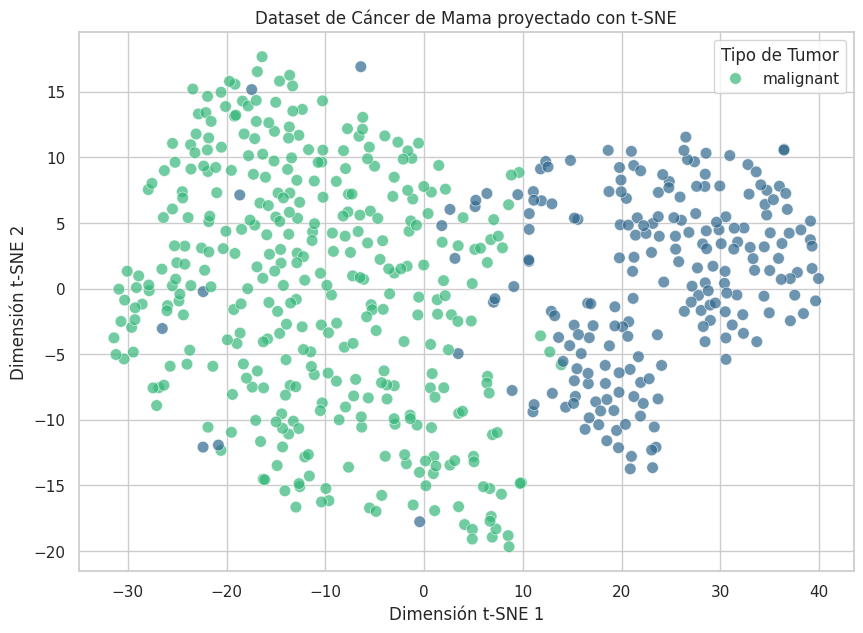

In [16]:
from sklearn.manifold import TSNE

# Usaremos el mismo dataset de cáncer de mama escalado (X_cancer_scaled)
# para demostrar t-SNE, ya que es un buen ejemplo de alta dimensionalidad con clases distintas.

# --- Aplicar t-SNE ---
# Puede tomar un tiempo para ejecutarse, especialmente con muchos puntos.
# `n_jobs=-1` usa todos los núcleos disponibles.
# Experimenta con 'perplexity' (ej. 5, 15, 30, 50) para ver cómo afecta el layout.
# `init='pca'` es una buena práctica para inicializar t-SNE con una reducción previa de PCA.
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, n_jobs=-1, learning_rate='auto', init='pca')
X_tsne = tsne.fit_transform(X_cancer_scaled)

# --- Visualización en 2D ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_cancer, palette='viridis',
                alpha=0.7, s=70, edgecolor='w', linewidth=0.5,
                hue_order=np.unique(y_cancer),
                legend='full')
plt.title('Dataset de Cáncer de Mama proyectado con t-SNE')
plt.xlabel('Dimensión t-SNE 1')
plt.ylabel('Dimensión t-SNE 2')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=[target_names_cancer[0], target_names_cancer[1]], title='Tipo de Tumor')
plt.grid(True)
plt.show()

**Comentarios del Código**

- **TSNE**: La clase principal de `sklearn.manifold` que implementa el algoritmo t-SNE.

- **perplexity**: El parámetro más crítico de t-SNE. Controla el número efectivo de vecinos considerados.  
  Probar con diferentes valores es clave para obtener una representación significativa.

- **n_iter**: Número de iteraciones del algoritmo.  
  Un valor más alto (por ejemplo, 1000 o más) permite que el algoritmo converja mejor y genere una proyección más estable.

- **n_jobs=-1**: Permite paralelizar el cálculo usando **todos los núcleos disponibles** del CPU, acelerando el procesamiento (si tu versión de scikit-learn lo permite).

- **init='pca'**: Buena práctica para **inicializar** t-SNE usando previamente una reducción por **PCA**, lo que puede ayudar a estabilizar y acelerar la convergencia.


## **3. UMAP (Uniform Manifold Approximation and Projection)**

**Concepto**

UMAP es una técnica de reducción de la dimensionalidad relativamente nueva (publicada en 2018) pero extremadamente potente y popular, especialmente en el campo de la biología computacional (por ejemplo, análisis de datos de *single-cell RNA-seq*).

Al igual que t-SNE, es una técnica **no lineal** que busca preservar la estructura **local y global** de los datos, pero a menudo es **más rápida y escalable** que t-SNE para grandes datasets, y tiende a preservar mejor la **estructura global**, resultando en visualizaciones más limpias y con menos artefactos.

---

### **¿Cómo funciona? (La Perspectiva Topológica)**

UMAP se basa en la **geometría riemanniana** y la **topología algebraica** para construir una representación de baja dimensión de los datos.

#### **1. Construcción de un Grafo de Vecinos (Alta Dimensión)**
UMAP construye un **grafo difuso** (fuzzy graph) en el espacio de alta dimensión, donde:
- Los **nodos** son los puntos de datos.
- Las **aristas** representan la fuerza de conexión entre puntos cercanos, basada en distancias y densidades locales.

#### **2. Optimización del Grafo en Baja Dimensión**
- Se crea un grafo similar en el espacio reducido (2D o 3D).
- Se optimiza para que **preserve la topología** del grafo original.
- Utiliza una función de costo para ajustar la representación final.

---

### **Parámetros Clave**

- **`n_neighbors`**:  
  Controla el tamaño de la vecindad local.  
  - Valores bajos (2–10): Enfatizan estructura **local**.  
  - Valores altos (30–100+): Enfatizan estructura **global**.

- **`min_dist`**:  
  Determina cuán juntos pueden estar los puntos en el espacio reducido.  
  - Valor bajo (`0.0`): Agrupa puntos densamente.  
  - Valor alto (`0.1–0.5`): Separa clusters, visualmente más claros.

- **`metric`**:  
  Métrica de distancia usada. Comúnmente:  
  - `'euclidean'`, `'cosine'`, `'correlation'` (muy usada en expresión génica).

---

### **Ventajas**

- **Velocidad y Escalabilidad**: Más rápido que t-SNE, ideal para grandes datasets genómicos.
- **Preservación Local y Global**: Buen equilibrio entre estructuras finas y relaciones generales.
- **Determinismo**: Si se fija `random_state`, el resultado es reproducible.
- **Visualizaciones más limpias**: Menos artefactos, agrupaciones claras.
- **Aplicable a Nuevos Datos**: A diferencia de t-SNE, permite transformar nuevos datos al mismo espacio.

---

### **Desventajas**

- **Complejidad Teórica**: Su base matemática puede ser difícil de entender en profundidad.
- **Requiere Instalación**: No viene preinstalado con `scikit-learn`. Se debe instalar con:


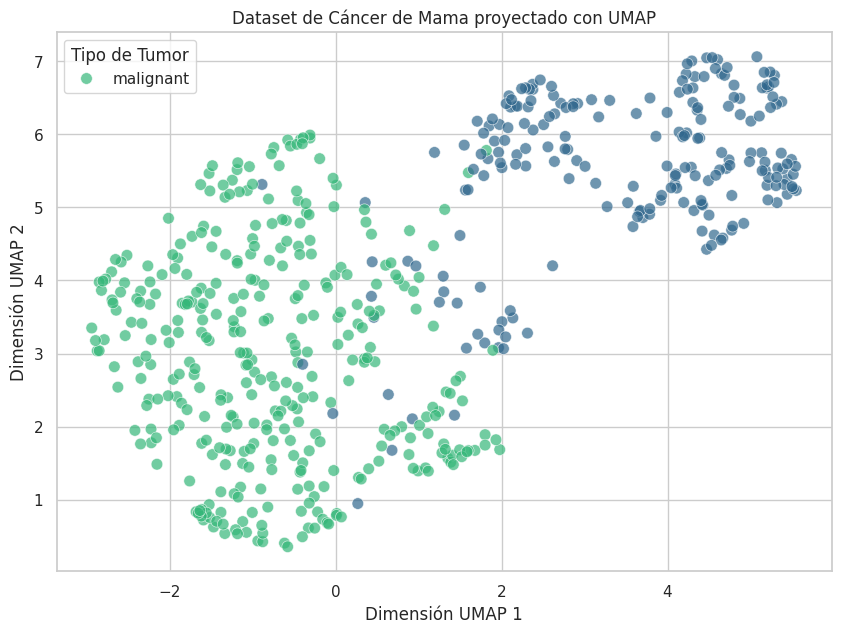

In [17]:
# !pip install umap-learn # Descomenta y ejecuta si no lo tienes instalado
import umap.umap_ as umap # La convención de importación estándar

# Usaremos el mismo dataset de cáncer de mama escalado (X_cancer_scaled)

# --- Aplicar UMAP ---
# Experimentar con n_neighbors y min_dist para ver cómo cambia la visualización
# n_neighbors: entre 5 y 50-100 es un buen rango.
# min_dist: entre 0.0 y 0.5.
reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1) # Valores típicos
X_umap = reducer.fit_transform(X_cancer_scaled)

# --- Visualización en 2D ---
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_umap[:, 0], y=X_umap[:, 1], hue=y_cancer, palette='viridis',
                alpha=0.7, s=70, edgecolor='w', linewidth=0.5,
                hue_order=np.unique(y_cancer),
                legend='full')
plt.title('Dataset de Cáncer de Mama proyectado con UMAP')
plt.xlabel('Dimensión UMAP 1')
plt.ylabel('Dimensión UMAP 2')
handles, _ = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles[1:], labels=[target_names_cancer[0], target_names_cancer[1]], title='Tipo de Tumor')
plt.grid(True)
plt.show()

**Comentarios del Código**

- `!pip install umap-learn`:  
  Si estás ejecutando el notebook en Google Colab o en un entorno que no tiene instalada la librería, esta es la forma de instalarla. Se ejecuta como un comando de sistema.

- `umap.UMAP`:  
  Es la **clase principal** que implementa el algoritmo UMAP. Al instanciarla, puedes ajustar sus parámetros clave:

  - **`n_neighbors`**: Controla el tamaño de la vecindad utilizada para construir el grafo de alta dimensión.  
    Afecta el equilibrio entre estructura local y global.

  - **`min_dist`**: Controla la **compactación** de los puntos en la proyección.  
    Un valor bajo agrupa los puntos muy juntos, mientras que un valor más alto los separa más visiblemente.

- Es buena práctica combinar UMAP con una reducción previa por PCA si el dataset tiene muchas dimensiones, para mejorar la eficiencia computacional.


# **4. Ejercicios Propuestos**

Estos ejercicios son una oportunidad para aplicar lo aprendido y experimentar.  
Dada la restricción de tiempo, los abordaremos como demostraciones rápidas o puntos de partida para la exploración individual posterior.

---

## Ejercicio 1: Comparando Métricas de Enlace en Clustering Jerárquico

- Utiliza el dataset de expresión génica simplificado (`X_genes_scaled`).

```python
X_genes, _ = make_blobs(n_samples=20, n_features=5, centers=4, cluster_std=1.5, random_state=42)
scaler_genes = StandardScaler()
X_genes_scaled = scaler_genes.fit_transform(X_genes)`
```

- Vuelve a generar el dendrograma para `X_genes_scaled` usando los métodos **single** y **complete linkage** (además del **ward** ya visto).

- Compara visualmente los dendrogramas.  

  **Preguntas para guiar la comparación:**
  - ¿Qué diferencias observas en la formación de clusters y en las alturas de fusión?  
  - ¿Cómo se relaciona esto con las propiedades de cada método de enlace?


## Ejercicio 2: Impacto del Perplexity en t-SNE

Utiliza el dataset de cáncer de mama (`X_cancer_scaled`).

```python
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
X_cancer = data_cancer.data
y_cancer = data_cancer.target
scaler_cancer = StandardScaler()
X_cancer_scaled = scaler_cancer.fit_transform(X_cancer)
target_names_cancer = data_cancer.target_names
```

1. Ejecuta t-SNE dos veces, con `perplexity=5` y `perplexity=50`.

2. Visualiza los resultados en 2D, coloreando por las etiquetas originales.

3. Discute cómo el cambio en perplexity altera la representación de los clusters y las relaciones entre ellos.


# **5. Conclusión y Recursos Adicionales**

Hemos explorado los fundamentos del aprendizaje no supervisado, cubriendo técnicas esenciales de clustering (k-means, jerárquico, DBSCAN) y reducción de la dimensionalidad (PCA, t-SNE, UMAP). Han visto cómo estas herramientas son indispensables para descubrir patrones ocultos, agrupar datos similares y simplificar la complejidad de los datasets en el ámbito de la biología y la medicina.

---

## **Aspectos Clave y Consideraciones Prácticas**

- **No hay un "mejor" algoritmo universal:** La elección de la técnica (y sus parámetros) siempre dependerá de la naturaleza de sus datos, el objetivo específico del análisis y el conocimiento de su dominio. No hay una solución única para todos los problemas.

- **Importancia del Preprocesamiento:** El escalado de datos es casi siempre un paso crítico. La selección de características también puede ser un preprocesamiento valioso para reducir la dimensionalidad inicial y el ruido antes de aplicar estas técnicas.

- **Exploración Iterativa:** El aprendizaje no supervisado es a menudo un proceso exploratorio e iterativo. Implica experimentar con diferentes algoritmos, parámetros y métricas de evaluación, y validar los hallazgos con el conocimiento experto del dominio.

- **Visualización vs. Clustering:** Recuerden que técnicas como t-SNE y UMAP son primariamente para visualización. Aunque agrupan visualmente los datos, no son algoritmos de clustering per se; a menudo, se aplica un algoritmo de clustering (como k-means o DBSCAN) sobre los datos proyectados en 2D/3D por UMAP/t-SNE.

- **Interpretabilidad:** Mientras que el aprendizaje supervisado nos da modelos con "respuestas", el no supervisado nos da "insights". La interpretación de los clusters o las componentes reducidas es tan importante como el cálculo en sí.

---



## **Resumen Clave**

- **Aprendizaje No Supervisado:** Descubre estructuras y patrones en datos sin etiquetas predefinidas.

- **Clustering:** Agrupa puntos de datos similares en base a su proximidad.

- **k-means:** Rápido, sensible a *k* y a la inicialización, asume clusters esféricos.

- **Jerárquico:** Construye una jerarquía de clusters (dendrograma), no necesita *k* de antemano.

- **DBSCAN:** Basado en densidad, encuentra clusters de formas arbitrarias y detecta ruido.

- **Reducción de la Dimensionalidad:** Transforma datos de alta a baja dimensión, preservando información.

- **PCA:** Lineal, maximiza la varianza, ideal para datos lineales y preprocesamiento.

- **t-SNE:** No lineal, preserva relaciones de vecinos cercanos, excelente para visualización de clusters.

- **UMAP:** No lineal, rápido y escalable, preserva tanto la estructura local como global, ideal para grandes datasets.

- **Evaluación:** Métricas intrínsecas como Silhouette Score, Calinski-Harabasz Index y Davies-Bouldin Index ayudan a cuantificar la calidad de los clusters en ausencia de etiquetas, pero deben interpretarse con cautela y en contexto.


## **Recursos Adicionales Recomendados**

Para quienes deseen profundizar, estos recursos son excelentes puntos de partida:

- **Documentación de Scikit-learn:** Siempre es el primer lugar para buscar detalles técnicos y ejemplos de implementación.  
  - [Módulos de Clustering](https://scikit-learn.org/stable/modules/clustering.html)  
  - [Reducción de Dimensionalidad (Descomposición y Manifold Learning)](https://scikit-learn.org/stable/modules/manifold.html)

- **Libro "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow"** de Aurélien Géron:  
  Un manual muy práctico y didáctico para machine learning en general, con capítulos sólidos sobre aprendizaje no supervisado.

- **Artículos Interactivos de Distill.pub:**  
  Son visualizaciones geniales para entender mejor algoritmos complejos.  
  - [Visualizing Data Using t-SNE (muy recomendado, visual e interactivo)](https://distill.pub/2016/misread-tsne/)

- **Repositorio UMAP en GitHub:**  
  Para más detalles sobre su funcionamiento y aplicaciones, incluyendo ejemplos de uso avanzado.  
  - [UMAP - Uniform Manifold Approximation and Projection](https://github.com/lmcinnes/umap)
